In [411]:
def z_normalize(x):
    m=len(x)
    z=[0]*m
    se=0
    mean=sum(x)/m
    for i in range(m):
        se+=(x[i]-mean)**2
    mse=se/(m-1) 
    for i in range(m):
        z[i]=(x[i]-mean)/mse
    x=z
    return x

In [412]:
def mean_normalize(x):
    max=max(x)
    min=min(x)
    mean=sum(x)/len(x)
    for i in range(len(x)):
        x[i]=(x[i]-min)/(max-min)
    return x 


In [413]:
def rescale(x):
    max=max(x)
    for i in range(len(x)):
        x[i]=x[i]/max 
    return x

In [414]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.setrecursionlimit(10000)
x=np.array([-3,-2,-1,0,1,2,3])
y=np.array(x**2)

In [415]:

x,y

(array([-3, -2, -1,  0,  1,  2,  3]), array([9, 4, 1, 0, 1, 4, 9]))

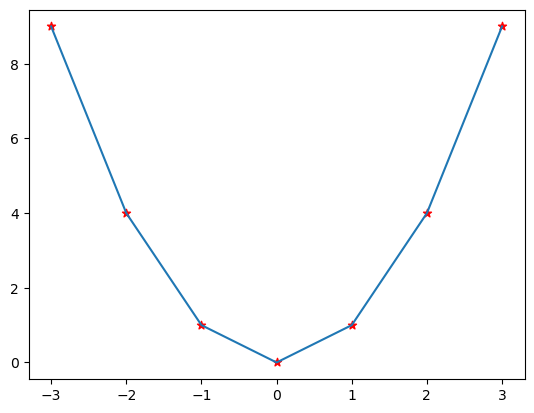

In [416]:
plt.plot(x,y)
plt.scatter(x,y,c='r',marker='*')

In [417]:
x_train=np.array([(0,0)]*7)

In [418]:
for i in range(len(x)):
    x_train[i]=(x[i]**2,x[i])

In [419]:
x_train

array([[ 9, -3],
       [ 4, -2],
       [ 1, -1],
       [ 0,  0],
       [ 1,  1],
       [ 4,  2],
       [ 9,  3]])

In [420]:
y_train=y

In [421]:
y_train

array([9, 4, 1, 0, 1, 4, 9])

In [422]:
def compute_cost(w,b,x,y):
    m=len(x)
    cost=0
    for i in range(m):
        cost+=(np.dot(w,x[i])+b-y[i])**2
    return cost/(2*m)

In [423]:
def dJ_dwk(w,b,x,y,k):
    m=len(x)
    diff=0
    for i in range(m):
        diff+=(np.dot(w,x[i])+b-y[i])*x[i][k]
    return diff/m

In [424]:
def dJ_db(w,b,x,y):
    m=len(x)
    diff=0
    for i in range(m):
        diff+=(np.dot(w,x[i])+b-y[i])
    return diff/m

In [425]:
def gradient_descent(w,b,x,y,init_cost,l_r,max_steps=10000,step=0):
    m=len(x)
    n=len(w)
    if init_cost is None:
        init_cost=compute_cost(w,b,x,y)
    new_w=w.copy()
    for r in range(n):
        new_w[r]=new_w[r]-(l_r*(dJ_dwk(w,b,x,y,r)))
    new_b=b-l_r*(dJ_db(w,b,x,y))
    new_cost=compute_cost(new_w,new_b,x,y)
    if new_cost<init_cost and step<max_steps:
        return gradient_descent(new_w,new_b,x,y,new_cost,l_r,max_steps,step+1)
    else:
        return new_w,new_b

In [426]:
w=np.array([22.0,6.0])
b=-25

In [427]:
gradient_descent(w,b,x_train,y_train,None,0.01,max_steps=10000,step=0)

(array([1.00000000e+00, 1.10924299e-16]), -8.776800746736967e-14)

In [ ]:
print("Final weights:", final_w)
print("Final bias:", final_b)